In [1]:
from modelTraining import run_model, load_from_file, compute_feature_ranking, plot_metrics, split_set
import joblib
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from NeuralNetwork import createMLP, createMLP_variableSizes, OurNeuralNetwork
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler        # Normalizaçao
from sklearn.preprocessing import MinMaxScaler          # Normalizaçao

SEED = 42

In [2]:
num_features = 4

# --- Carregar dataset Iris ---
def load_data_set():
    data = load_iris()
    X = data.data
    y = data.target
    return X, y

def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"Modelo salvo em {filename}")

def load_model(filename):
    model = joblib.load(filename)
    print(f"Modelo carregado de {filename}")
    return model

X_iris, y_iris = load_data_set()

# EX 2

## EX 2.1. - Baseline

### Random Classifier

In [21]:
random_model = DummyClassifier(strategy='uniform', random_state=SEED)
# parameters = {"DummyClassifier": {'strategy': ['most_frequent', 'stratified', 'uniform']}}

metrics_to = run_model(X_iris, y_iris, random_model, "TO", None, "Random Classifier TO", "Random Classifier TO", random_state=SEED)
metrics_tt = run_model(X_iris, y_iris, random_model, "TT", None, "Random Classifier TT", "Random Classifier TT", random_state=SEED)
metrics_cv = run_model(X_iris, y_iris, random_model, "CV-base", None, "Random Classifier CV", "Random Classifier CV", random_state=SEED, feature_ranking=False)


===== Random Classifier TO =====
Confusion Matrix:
[[15 15 20]
 [18 21 11]
 [15 10 25]]
Recall:    0.4067
Precision: 0.4052
F1-Score:  0.4051

===== Random Classifier TT =====
Confusion Matrix:
[[2 6 7]
 [6 4 5]
 [6 2 7]]
Recall:    0.2889
Precision: 0.2815
F1-Score:  0.2820

===== Random Classifier CV (means) =====

Confusion Matrix (Mean +/- Std)
[2. 0. 3.] +/- [0. 0. 0.]
[1. 1. 3.] +/- [0. 0. 0.]
[1. 1. 3.] +/- [0. 0. 0.]
Recall:    0.4000 ± 0.0000
Precision: 0.4444 ± 0.4444
F1-Score:  0.3862 ± 0.0000


### One R

In [22]:
oneR = DecisionTreeClassifier(max_depth=5, random_state=SEED)
# parameters = {"oneR": {
#         'max_depth': [None, 5, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'criterion': ['gini', 'entropy']
#     }}

metrics_to = run_model(X_iris, y_iris, oneR, "TO", None, "One R TO", "One R TO", random_state=SEED)
metrics_tt = run_model(X_iris, y_iris, oneR, "TT", None, "One R TT", "One R TT", random_state=SEED)
metrics_cv = run_model(X_iris, y_iris, oneR, "CV-base", None, "One R CV", "One R CV", random_state=SEED, feature_ranking=False)


===== One R TO =====
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Recall:    0.9933
Precision: 0.9935
F1-Score:  0.9933

===== One R TT =====
Confusion Matrix:
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]
Recall:    0.9333
Precision: 0.9444
F1-Score:  0.9327

===== One R CV (means) =====

Confusion Matrix (Mean +/- Std)
[5. 0. 0.] +/- [0. 0. 0.]
[0.   4.59 0.41] +/- [0.   0.58 0.58]
[0.   0.42 4.58] +/- [0.   0.59 0.59]
Recall:    0.9447 ± 0.0525
Precision: 0.9523 ± 0.9523
F1-Score:  0.9439 ± 0.0537


## EX 2.2.1. - kNN (k = 1)

In [23]:
k = 1
kNN = KNeighborsClassifier(n_neighbors = k)
parameters = {'KNeighborsClassifier' : {
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
        }}

metrics_to = run_model(X_iris, y_iris, kNN, "TO", None, "kNN TO", "kNN TO", random_state=SEED)
metrics_tt = run_model(X_iris, y_iris, kNN, "TT", None, "kNN TT", "kNN TT", random_state=SEED)
metrics_cv = run_model(X_iris, y_iris, kNN, "CV-base", None, "kNN CV", "kNN CV", random_state=SEED)


===== kNN TO =====
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Recall:    1.0000
Precision: 1.0000
F1-Score:  1.0000

===== kNN TT =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
Recall:    0.9333
Precision: 0.9444
F1-Score:  0.9327

===== kNN CV (means) =====

Confusion Matrix (Mean +/- Std)
[5. 0. 0.] +/- [0. 0. 0.]
[0.  4.7 0.3] +/- [0.   0.54 0.54]
[0.   0.32 4.68] +/- [0.   0.49 0.49]
Recall:    0.9587 ± 0.0469
Precision: 0.9646 ± 0.9646
F1-Score:  0.9581 ± 0.0476


## EX 2.2.2. - kNN (k in range(1,16,2))

K value: 1

===== kNN TO k = 1 =====
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Recall:    1.0000
Precision: 1.0000
F1-Score:  1.0000

===== kNN TVT k = 1 =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
Recall:    0.9333
Precision: 0.9444
F1-Score:  0.9327
Modelo salvo em models/ex_2_2_2/kNN_TVT_k_1.pkl

===== kNN CV k = 1 (means) =====

Confusion Matrix (Mean +/- Std)
[5. 0. 0.] +/- [0. 0. 0.]
[0.  4.7 0.3] +/- [0.   0.54 0.54]
[0.   0.32 4.68] +/- [0.   0.49 0.49]
Recall:    0.9587 ± 0.0469
Precision: 0.9646 ± 0.9646
F1-Score:  0.9581 ± 0.0476
K value: 3

===== kNN TO k = 3 =====
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Recall:    0.9667
Precision: 0.9668
F1-Score:  0.9667

===== kNN TVT k = 3 =====
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
Recall:    0.9556
Precision: 0.9608
F1-Score:  0.9554
Modelo salvo em models/ex_2_2_2/kNN_TVT_k_3.pkl

===== kNN CV k = 3 (means) =====

Confusion Matrix (Mean +/- Std)
[5. 0. 0.] +/- [0. 0. 0.]


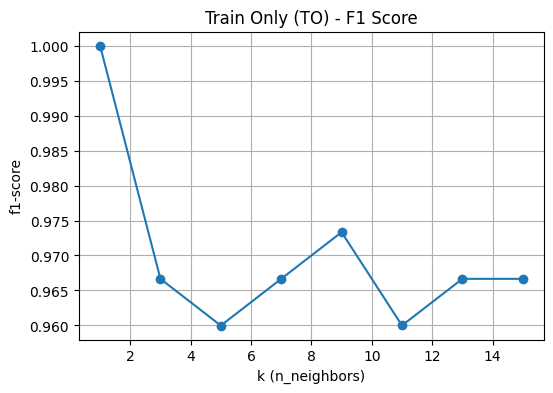

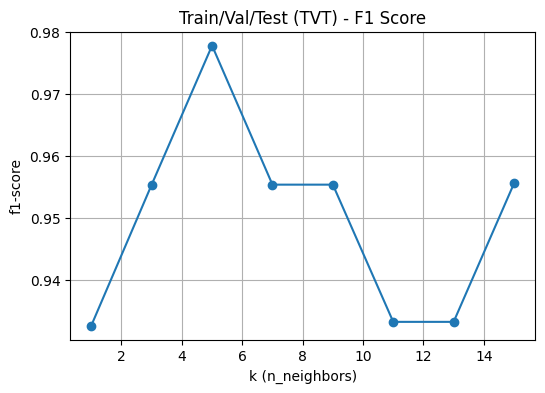

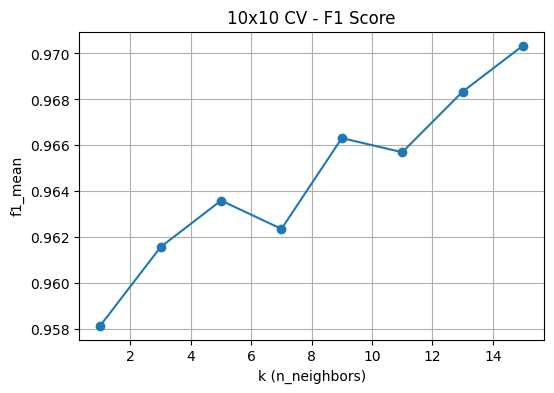

In [4]:
# RUN TIME = 5 seg

parameters = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }

to_scores = []
tvt_scores = []
cv_scores = []

for k in range(1,16,2):
    print("K value:", k)
    kNN = KNeighborsClassifier(n_neighbors = k)

    metrics_to = run_model(X_iris, y_iris, kNN, "TO", None, f"models/ex_2_2_2/kNN_TO_k_{k}.pkl", f"kNN TO k = {k}", random_state=SEED, printing=True)
    metrics_tvt = run_model(X_iris, y_iris, kNN, "TVT", parameters, f"models/ex_2_2_2/kNN_TVT_k_{k}.pkl", f"kNN TVT k = {k}", random_state=SEED, feature_ranking=False, printing=False)
    metrics_cv = run_model(X_iris, y_iris, kNN, "CV-base", parameters, f"models/ex_2_2_2/kNN_CV_k_{k}.pkl", f"kNN CV k = {k}", random_state=SEED, feature_ranking=False, printing=False)

    to_scores.append({
        'k': k,
        'f1-score': metrics_to['f1-score'],
        'recall': metrics_to['recall'],
        'precision': metrics_to['precision'],
        'confusion_matrix': metrics_to['confusion_matrix']
    })

    tvt_scores.append({
        'k': k,
        'f1-score': metrics_tvt['f1-score'],
        'recall': metrics_tvt['recall'],
        'precision': metrics_tvt['precision'],
        'confusion_matrix': metrics_tvt['confusion_matrix']
    })


    cv_scores.append({
        'k': k,
        'f1_mean': metrics_cv['f1-score']
        # 'recall': metrics_cv['recall'],
        # 'precision': metrics_cv['precision'],
        # 'cm_mean': metrics_cv['cm_mean'],
        # 'cm_std': metrics_cv['cm_std']
    })

plot_metrics(to_scores, metric_name='f1-score', title='Train Only (TO) - F1 Score')
plot_metrics(tvt_scores, metric_name='f1-score', title='Train/Val/Test (TVT) - F1 Score')
plot_metrics(cv_scores, metric_name='f1_mean', title='10x10 CV - F1 Score')

## EX 2.3.1. - TVT

Score:
[3 2 0 1]


,n_features,recall,precision,f1
0,1,0.955556,0.960784,0.955357
1,2,0.977778,0.979167,0.977753
2,3,0.977778,0.979167,0.977753
3,4,0.977778,0.979167,0.977753


TOP 2 features
BEST FEATURES [3 2]


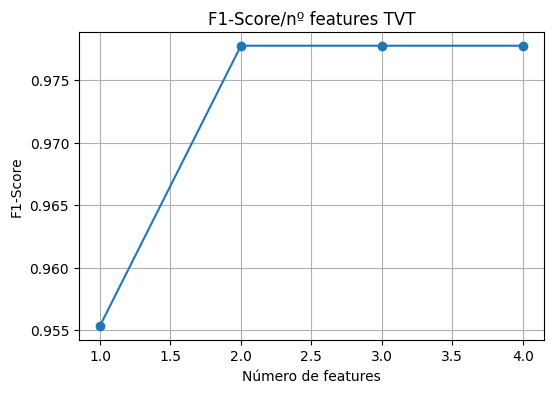

Best Parameters: {'n_neighbors': 1}

===== EX 2.3.1 TVT - KNN =====
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Recall:    0.9333
Precision: 0.9345
F1-Score:  0.9333
Modelo salvo em ./models/ex2_3_1_tvt.pkl
FINAL METRICS: {'confusion_matrix': array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 13]]), 'recall': 0.9333333333333332, 'precision': 0.9345238095238096, 'f1-score': 0.9332591768631814}


In [4]:
model = KNeighborsClassifier()
parameters = { 'n_neighbors': list(range(1, 16, 2)) }
filename = "./models/ex2_3_1_tvt.pkl"
metrics = run_model(X_iris, y_iris, model, "TVT", parameters, filename, label="EX 2.3.1 TVT - KNN", random_state=SEED)
print("FINAL METRICS:", metrics)

## EX 2.3.1. - CV

In [ ]:
models = {
    "Random": DummyClassifier()     
    #"kNN": KNeighborsClassifier(),                           # k=5 por defeito
    #"OneR": DecisionTreeClassifier(random_state=SEED),       # Decision Tree
    #"SVM": SVC(random_state=SEED)                         # SVM com kernel RBF por omissão
    # "ANN": MLPClassifier(random_state=SEED, max_iter=1000)   # Rede Neural
}

parameters = {

    'Random': {
        'strategy': ['most_frequent', 'stratified', 'uniform']   # <-- parâmetros adicionados
    }# ,

    # 'kNN' : {
    #     'n_neighbors': [1, 3, 5, 7, 9],
    #     'weights': ['uniform', 'distance'],
    #     'metric': ['euclidean', 'manhattan']
    # },

    # 'OneR' : {
    #     'max_depth': [None, 5, 10, 20],
    #     'min_samples_split': [2, 5, 10],
    #     'criterion': ['gini', 'entropy']
    # },

    # 'SVM' : {
    #     'C': [0.1, 1, 10],
    #     'kernel': ['linear', 'rbf'],
    #     'gamma': ['scale', 'auto']
    # }

    # 'ANN': {
    #     'hidden_layer_sizes': [(50,), (100,), (50,50)],
    #     'activation': ['tanh'],
    #     'alpha': [0.0001, 0.001, 0.01]
    # } estava a dar o warning: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
}

filename = "./models/ex2_3_1_cv.pkl"
metrics = run_model(X_iris, y_iris, models, "CV", parameters, filename, label="EX 2.3.1 TVT - KNN", random_state=SEED)
print("FINAL METRICS:", metrics)

Fold 0
Best Parameters: {'strategy': 'stratified'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 1
Best Parameters: {'strategy': 'uniform'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 2
Best Parameters: {'strategy': 'stratified'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Fold 3
Best Parameters: {'strategy': 'uniform'}
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean'}
Best Parameters: {'max_depth': Non

,Mean_F1,Std_F1
OneR,0.334069,0.109047
kNN,0.944704,0.059554
C4.5,0.952086,0.051988
SVM,0.957377,0.047925


Modelo com maior média de F1: SVM
SVC(random_state=42)
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 11
Fold 12
Fold 13
Fold 14
Fold 15
Fold 16
Fold 17
Fold 18
Fold 19
Fold 20
Fold 21
Fold 22
Fold 23
Fold 24
Fold 25
Fold 26
Fold 27
Fold 28
Fold 29
Fold 30
Fold 31
Fold 32
Fold 33
Fold 34
Fold 35
Fold 36
Fold 37
Fold 38
Fold 39
Fold 40
Fold 41
Fold 42
Fold 43
Fold 44
Fold 45
Fold 46
Fold 47
Fold 48
Fold 49
Fold 50
Fold 51
Fold 52
Fold 53
Fold 54
Fold 55
Fold 56
Fold 57
Fold 58
Fold 59
Fold 60
Fold 61
Fold 62
Fold 63
Fold 64
Fold 65
Fold 66
Fold 67
Fold 68
Fold 69
Fold 70
Fold 71
Fold 72
Fold 73
Fold 74
Fold 75
Fold 76
Fold 77
Fold 78
Fold 79
Fold 80
Fold 81
Fold 82
Fold 83
Fold 84
Fold 85
Fold 86
Fold 87
Fold 88
Fold 89
Fold 90
Fold 91
Fold 92
Fold 93
Fold 94
Fold 95
Fold 96
Fold 97
Fold 98
Fold 99
[3, 2, 0, 1] 0.9684175084175085
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}
Best Parameters: {'C': 0.1, 'kernel': 'linear', 'gamma': 

# EX 3

In [6]:
csv_path = "../A/data_prepared_for_training.csv"

df = pd.read_csv(csv_path)

# Converter para NumPy
data = df.to_numpy()

print("All classes:\t\t", data.shape)

# Filtrar atividades entre 1 e 7 (coluna -2)
data = data[(data[:, -2] >= 1) & (data[:, -2] <= 7)]

print("Selected Classes (1-7):", data.shape)

All classes:		 (13833, 552)
Selected Classes (1-7): (13311, 552)


## EX3.1

In [7]:
# 2. Separar Features (X) e Labels (y)
X = X_features = np.delete(data, -2, axis=1)
y = data[:, -2]

print(X.shape)
print(y.shape)

(13311, 551)
(13311,)


### 1 Train Only

In [14]:
model = DecisionTreeClassifier(max_depth=5, random_state=SEED)
parameters = {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

filename = "./models/ex_3_1/ex3.1_OneR_TO.pkl"
metrics = run_model(X, y, model, "TO", parameters, filename, label="EX 3.1 TO - OneR", random_state=SEED, use_iris=False)


===== EX 3.1 TO - OneR =====
Confusion Matrix:
[[2818    0    0    0   21    8    0]
 [   0 1226  296    0    0    0    0]
 [   0   25 1427    0    0    0    0]
 [  17    0    0 2115  365   48    0]
 [  12    0    1 1441 1029   72    0]
 [   0    0    0  102   61 1443    0]
 [   0    0    0   73   47  657    7]]
Recall:    0.7028
Precision: 0.8125
F1-Score:  0.6745


### 2 Train Test

In [16]:
model = DecisionTreeClassifier(max_depth=5, random_state=SEED)
parameters = {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

filename = "./models/ex_3_1/ex3.1_OneR_TT.pkl"
metrics = run_model(X, y, model, "TT", parameters, filename, label="EX 3.1 TT - OneR", random_state=SEED, use_iris=False)

Treino: 9805 amostras
Teste: 3506 amostras

===== EX 3.1 TT - OneR =====
Confusion Matrix:
[[690  19  22   3  20   1   0]
 [  0 237 161   0   0   0   0]
 [  0 257 146   0   0   0   0]
 [  6   0   2 335 310  14   0]
 [  5   5   6 243 349  47   0]
 [  0   0   0  39  55 327   4]
 [  0   0   0  15  30 153   5]]
Recall:    0.5287
Precision: 0.5740
F1-Score:  0.5128


### 3 10x10-fold Cross Validation

In [ ]:
# RUN TIME: 5 min

model = DecisionTreeClassifier(max_depth=5, random_state=SEED)
parameters = {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
}

filename = "./models/ex_3_1/ex3.1_OneR_CV.pkl"
metrics = run_model(X, y, model, "CV-base", parameters, filename, label="EX 3.1 CV - OneR", random_state=SEED, use_iris=False, feature_ranking=False, flagPrintingFoldNumber=False)

Total de folds criados: 100
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 11
Fold 12
Fold 13
Fold 14
Fold 15
Fold 16
Fold 17
Fold 18
Fold 19
Fold 20
Fold 21
Fold 22
Fold 23
Fold 24
Fold 25
Fold 26
Fold 27
Fold 28
Fold 29
Fold 30
Fold 31
Fold 32
Fold 33
Fold 34
Fold 35
Fold 36
Fold 37
Fold 38
Fold 39
Fold 40
Fold 41
Fold 42
Fold 43
Fold 44
Fold 45
Fold 46
Fold 47
Fold 48
Fold 49
Fold 50
Fold 51
Fold 52
Fold 53
Fold 54
Fold 55
Fold 56
Fold 57
Fold 58
Fold 59
Fold 60
Fold 61
Fold 62
Fold 63
Fold 64
Fold 65
Fold 66
Fold 67
Fold 68
Fold 69
Fold 70
Fold 71
Fold 72
Fold 73
Fold 74
Fold 75
Fold 76
Fold 77
Fold 78
Fold 79
Fold 80
Fold 81
Fold 82
Fold 83
Fold 84
Fold 85
Fold 86
Fold 87
Fold 88
Fold 89
Fold 90
Fold 91
Fold 92
Fold 93
Fold 94
Fold 95
Fold 96
Fold 97
Fold 98
Fold 99

===== CV Results (Mean +/- Std) =====
Recall:    0.5740 +/- 0.0746
Precision: 0.5412 +/- 0.1123
F1-Score:  0.5139 +/- 0.0945

Confusion Matrix (Mean +/- Std):
[173.42   2.84   9.66 

## EX 3.2.

### 3.2.1. kNN k = 1

In [ ]:
# RUN TIME: 35 seg

k = 1
kNN = KNeighborsClassifier(n_neighbors = k)
parameters = {'KNeighborsClassifier' : {
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
        }}

metrics_to = run_model(X, y, kNN, "TO", None, "kNN TO", "kNN TO", random_state=SEED, use_iris=False)
metrics_tt = run_model(X, y, kNN, "TT", None, "kNN TT", "kNN TT", random_state=SEED, use_iris=False)
metrics_cv = run_model(X, y, kNN, "CV-base", None, "kNN CV", "kNN CV", random_state=SEED, use_iris=False, feature_ranking=False)


===== kNN TO =====
Confusion Matrix:
[[2847    0    0    0    0    0    0]
 [   0 1522    0    0    0    0    0]
 [   0    0 1452    0    0    0    0]
 [   0    0    0 2545    0    0    0]
 [   0    0    0    0 2555    0    0]
 [   0    0    0    0    0 1606    0]
 [   0    0    0    0    0    0  784]]
Recall:    1.0000
Precision: 1.0000
F1-Score:  1.0000
Treino: 9805 amostras
Teste: 3506 amostras

===== kNN TT =====
Confusion Matrix:
[[746   0   0   2   7   0   0]
 [  0 105 293   0   0   0   0]
 [  0  98 305   0   0   0   0]
 [ 14   0   0 304 330  11   8]
 [  8   0   0 191 445   3   8]
 [  0   0   0  42  14 259 110]
 [  0   0   0  16  28  91  68]]
Recall:    0.5840
Precision: 0.5926
F1-Score:  0.5767
Total de folds criados: 100

===== CV Results (Mean +/- Std) =====
Recall:    0.6051 +/- 0.0486
Precision: 0.6204 +/- 0.0552
F1-Score:  0.5920 +/- 0.0511

Confusion Matrix (Mean +/- Std):
[186.3    0.     0.     2.94   0.53   0.     0.  ] +/- [26.41  0.    0.    3.98  1.31  0.    0.  ]
[

### 3.2.2. kNN k in range(1,16,2)

K = 1
Treino: 6302 amostras
Validação: 3503 amostras
Teste: 3506 amostras

=====  =====
Confusion Matrix:
[[747   0   0   1   7   0   0]
 [  0  79 319   0   0   0   0]
 [  0  86 317   0   0   0   0]
 [ 14   0   0 307 331  12   3]
 [  9   0   0 202 438   1   5]
 [  0   0   0  42  12 250 121]
 [  0   0   0  15  28  94  66]]
Recall:    0.5738
Precision: 0.5806
F1-Score:  0.5621
Modelo salvo em models/ex_3_2/kNN_TVT_k_1.pkl
Total de folds criados: 100

=====  (means) =====

Confusion Matrix (Mean +/- Std)
[186.3    0.     0.     2.94   0.53   0.     0.  ] +/- [26.41  0.    0.    3.98  1.31  0.    0.  ]
[ 0.   58.67 43.01  0.    0.    0.    0.  ] +/- [ 0.   30.47 28.7   0.    0.    0.    0.  ]
[ 0.   31.44 65.94  0.    0.    0.    0.  ] +/- [ 0.   24.27 25.43  0.    0.    0.    0.  ]
[  2.37   0.     0.   100.89  60.36   4.09   2.19] +/- [ 2.03  0.    0.   32.32 32.69  5.22  2.42]
[ 2.01  0.    0.   81.93 83.1   1.88  1.49] +/- [ 1.66  0.    0.   38.88 37.51  3.29  2.14]
[ 0.    0.    0.   

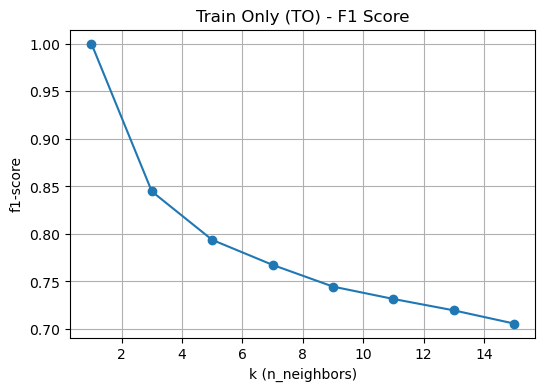

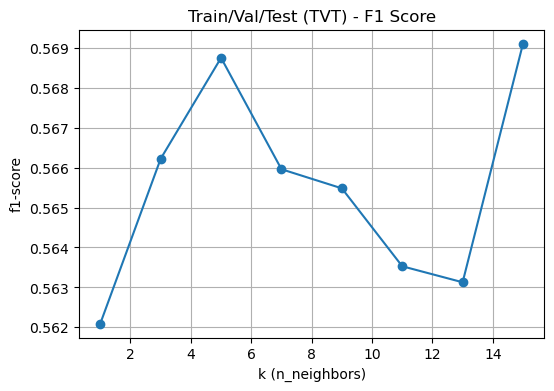

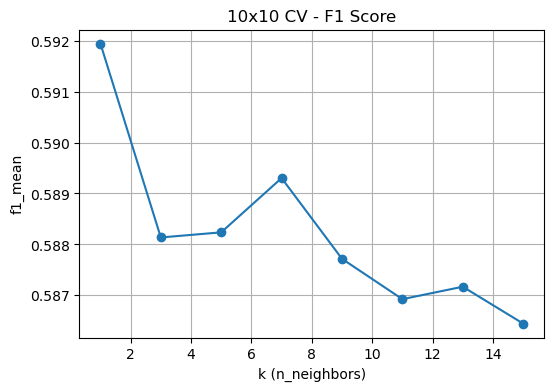

In [4]:
# RUN TIME = 

parameters = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    }

to_scores = []
tvt_scores = []
cv_scores = []

for k in range(1,16,2):
    print("K =", k)
    kNN = KNeighborsClassifier(n_neighbors = k)

    metrics_to = run_model(X, y, kNN, "TO", None, f"models/ex_3_2/kNN_TO_k_{k}.pkl", f"kNN TO k = {k}", random_state=SEED, printing=False, use_iris=False)
    metrics_tvt = run_model(X, y, kNN, "TVT", parameters, f"models/ex_3_2/kNN_TVT_k_{k}.pkl", random_state=SEED, feature_ranking=False, printing=False, use_iris=False)
    metrics_cv = run_model(X, y, kNN, "CV-base", parameters, f"models/ex_3_2/kNN_CV_k_{k}.pkl", random_state=SEED, feature_ranking=False, printing=False, use_iris=False, flagPrintingFoldNumber=False)

    to_scores.append({
        'k': k,
        'f1-score': metrics_to['f1-score'],
        'recall': metrics_to['recall'],
        'precision': metrics_to['precision'],
        'confusion_matrix': metrics_to['confusion_matrix']
    })

    tvt_scores.append({
        'k': k,
        'f1-score': metrics_tvt['f1-score'],
        'recall': metrics_tvt['recall'],
        'precision': metrics_tvt['precision'],
        'confusion_matrix': metrics_tvt['confusion_matrix']
    })

    print(metrics_cv)

    cv_scores.append({
        'k': k,
        'f1_mean': metrics_cv['f1-score']
        # 'recall': metrics_cv['recall'],
        # 'precision': metrics_cv['precision'],
        # 'cm_mean': metrics_cv['cm_mean'],
        # 'cm_std': metrics_cv['cm_std']
    })

plot_metrics(to_scores, metric_name='f1-score', title='Train Only (TO) - F1 Score')
plot_metrics(tvt_scores, metric_name='f1-score', title='Train/Val/Test (TVT) - F1 Score')
plot_metrics(cv_scores, metric_name='f1_mean', title='10x10 CV - F1 Score')

## EX 3.3

Treino: 6302 amostras
Validação: 3503 amostras
Teste: 3506 amostras
Score:
[353 352 356 132 133 136 209  15  11  12 342 125 341 345 101 319 123   1
   0 444 211   4 222 233 228 277 114 442 539  99 156 431 453 464 244 448
 334 224 497 332 112 499 257 255  13  22  23  26 223 287 365 367 376 540
 338 169 134 429 440 167 129 158 354 360 239 441 548 118 343 549  24 145
 279   2 486 542 162 283 470 407 261 475 147  48 455 323 507 443 382 477
 462 250 541 306 140 184 266   8 387 463 378  46 465 389 513 523 488 543
 328 321 544 256 296 330  59  19  57 397 333 111 110 517 510 454 404 524
 349  30 331 466 173 511  52  83 413 300 416 193 181 402  74 425 294 439
  63 291 501 459 246 496 371 303 151 529 213 528 492 481 520 104 451  68
 219 410 415 218 406 366 498 522 178 243 220 242 393 268 293 245 232 288
 418 302 278  37 452 272  71 476 516  35 419 401 417  84 121 197 122 438
 358 315  89 527 221 194 409 377 428  94 103 322 420 526 234 198 290 503
 237  67   3 214 403 199 355 398 320 545 189 157 

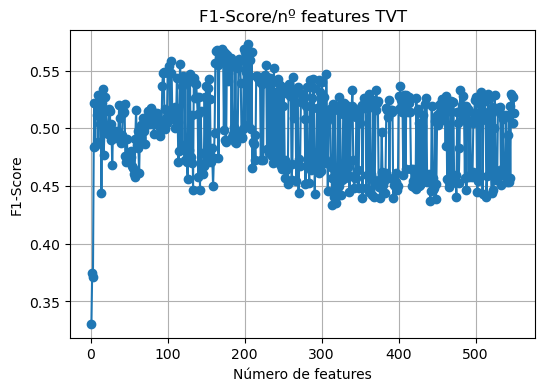

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'criterion': 'gini'}
Resultados dos parâmetros guardados em: ./models/ex_3_3/ex_3_3_OneR_TVT_param_set_scores.csv

===== EX 3.3 TVT - OneR =====
Confusion Matrix:
[[694  33   5   9  14   0   0]
 [  0 232 166   0   0   0   0]
 [  0 234 169   0   0   0   0]
 [  6   0   2 230 369  40  20]
 [  6   9   1 154 399  54  32]
 [  0   0   0  29  55 162 179]
 [  0   0   0  17  30  69  87]]
Recall:    0.5265
Precision: 0.5269
F1-Score:  0.5174
Modelo salvo em ./models/ex_3_3/ex_3_3_OneR_TVT



val f1-score: 0.5926305532832383
test f1-score: 0.5173507229993182
bfs: [353 352 356 132 133 136 209  15  11  12 342 125 341 345 101 319 123   1
   0 444 211   4 222 233 228 277 114 442 539  99 156 431 453 464 244 448
 334 224 497 332 112 499 257 255  13  22  23  26 223 287 365 367 376 540
 338 169 134 429 440 167 129 158 354 360 239 441 548 118 343 549  24 145
 279   2 486 542 162 283 470 407 261 475 147  48 455 323 507 443 382 477
 462 250 541 306 

In [ ]:
# RUN TIME: 40 min

model = DecisionTreeClassifier(random_state=SEED)
parameters = {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

filename = "./models/ex_3_3/ex_3_3_OneR_TVT"
metrics, best_score_with_val, bfs, best_parameters = run_model(X, y, model, "TVT", parameters, filename, label="EX 3.3 TVT - OneR", random_state=SEED, use_iris=False, printing=False, save_data=True)

print("\n\n")
print("val f1-score:", best_score_with_val)
print("test f1-score:", str(metrics["f1-score"]))
print("bfs:", bfs)
print("best parameters:", best_parameters)

In [ ]:
len(bfs)

204

In [12]:
print(bfs)
best_parameters

[353 352 356 132 133 136 209  15  11  12 342 125 341 345 101 319 123   1
   0 444 211   4 222 233 228 277 114 442 539  99 156 431 453 464 244 448
 334 224 497 332 112 499 257 255  13  22  23  26 223 287 365 367 376 540
 338 169 134 429 440 167 129 158 354 360 239 441 548 118 343 549  24 145
 279   2 486 542 162 283 470 407 261 475 147  48 455 323 507 443 382 477
 462 250 541 306 140 184 266   8 387 463 378  46 465 389 513 523 488 543
 328 321 544 256 296 330  59  19  57 397 333 111 110 517 510 454 404 524
 349  30 331 466 173 511  52  83 413 300 416 193 181 402  74 425 294 439
  63 291 501 459 246 496 371 303 151 529 213 528 492 481 520 104 451  68
 219 410 415 218 406 366 498 522 178 243 220 242 393 268 293 245 232 288
 418 302 278  37 452 272  71 476 516  35 419 401 417  84 121 197 122 438
 358 315  89 527 221 194]


{'max_depth': 10, 'min_samples_split': 10, 'criterion': 'gini'}

# EX 4 - MLP Existente

In [14]:
dic = split_set(X, y, random_state=SEED, use_iris=False)
X_train = dic["X_train"]
X_val = dic["X_val"]
y_train = dic["y_train"]
y_val = dic["y_val"]

# Chamar função
createMLP(X_train[:, bfs], y_train, X_val[:, bfs], y_val, 
          label="Teste_Sensores",
          hidden_layers=(150),
          learning_rate=0.01,
          max_iter=1000)

Treino: 6302 amostras
Validação: 3503 amostras
Teste: 3506 amostras

===== Teste_Sensores =====
Confusion Matrix:
[[730   0   0   1   6   0   0]
 [  0 398   0   0   0   0   0]
 [  0 330  18   0   0   0   0]
 [  1   0   0 306 345  22  15]
 [  3   0   0 210 433  13  25]
 [  0   0   0   3   7 282 140]
 [  0   0   0   2  10  99 104]]
Recall:    0.6080
Precision: 0.6732
F1-Score:  0.5669


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'confusion_matrix': array([[730,   0,   0,   1,   6,   0,   0],
        [  0, 398,   0,   0,   0,   0,   0],
        [  0, 330,  18,   0,   0,   0,   0],
        [  1,   0,   0, 306, 345,  22,  15],
        [  3,   0,   0, 210, 433,  13,  25],
        [  0,   0,   0,   3,   7, 282, 140],
        [  0,   0,   0,   2,  10,  99, 104]], dtype=int64),
 'recall': 0.6079839618160099,
 'precision': 0.6731595260864128,
 'f1-score': 0.5668957686317804}

## 4.1.

Treino: 6302 amostras
Validação: 3503 amostras
Teste: 3506 amostras
Neurónios  | F1-Score  
-------------------------
10         | 0.5752
25         | 0.5836
50         | 0.5725
75         | 0.5526
100        | 0.5733
150        | 0.5669
200        | 0.5720
300        | 0.5728
400        | 0.5707
500        | 0.5672
1000       | 0.5694


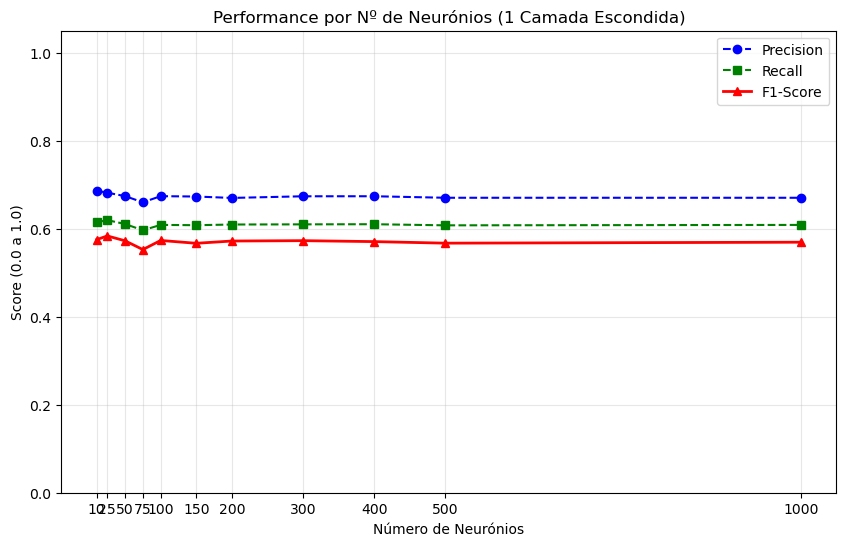

O melhor resultado foi com 25 neurónios.
F1 Score atingido: 0.5836271508831461


In [18]:
dic = split_set(X, y, random_state=SEED, use_iris=False)
X_train = dic["X_train"]
X_val = dic["X_val"]
y_train = dic["y_train"]
y_val = dic["y_val"]

results = createMLP_variableSizes(
    X_train[:, bfs], y_train, X_val[:, bfs], y_val,
    sizes_to_test=[10,25,50,75,100,150,200,300,400,500,1000],
    learning_rate_type='constant',  
    learning_rate=0.01, # Valor inicial
    momentum=0.0,
)

melhor_f1 = max(results['f1_scores'])
indice_melhor = results['f1_scores'].index(melhor_f1)
melhor_size = results['sizes'][indice_melhor]

print(f"O melhor resultado foi com {melhor_size} neurónios.")
print(f"F1 Score atingido: {melhor_f1}")


In [19]:
activations = ["relu", "identity", "logistic", "tanh"]

# Dicionário para guardar os resultados de cada volta
resultados_por_ativacao = {} 

best_f1 = 0
best_activation = ""

for act in activations:
    # 1. Cria e treina o modelo
    metrics = createMLP(
        X_train[:, bfs], y_train, X_val[:, bfs], y_val, 
        hidden_layers=(melhor_size,), 
        activation=act, 
        label=f"4.1 - Fixed learning rate - {act}"
    )
    
    current_f1 = metrics['f1-score']  # <--- Ajuste esta chave se necessário
    resultados_por_ativacao[act] = current_f1
    
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_activation = act

print("-" * 30)
print(f"Melhor Ativação: {best_activation}")
print(f"F1 Score: {best_f1:.4f}")


===== 4.1 - Fixed learning rate - relu =====
Confusion Matrix:
[[737   0   0   0   0   0   0]
 [  0 396   2   0   0   0   0]
 [  0 314  34   0   0   0   0]
 [  0   0   0 404 254  19  12]
 [  0   0   0 300 351  14  19]
 [  0   0   0   4   6 354  68]
 [  0   0   0   2  10 142  61]]
Recall:    0.6136
Precision: 0.6696
F1-Score:  0.5813

===== 4.1 - Fixed learning rate - identity =====
Confusion Matrix:
[[736   0   0   0   1   0   0]
 [  0 398   0   0   0   0   0]
 [  0 327  21   0   0   0   0]
 [  0   0   0 388 263  23  15]
 [  2   0   0 271 376  12  23]
 [  0   0   0   3   8 289 132]
 [  0   0   0   2  11 102 100]]
Recall:    0.6151
Precision: 0.6786
F1-Score:  0.5772

===== 4.1 - Fixed learning rate - logistic =====
Confusion Matrix:
[[737   0   0   0   0   0   0]
 [  0 390   8   0   0   0   0]
 [  0 224 124   0   0   0   0]
 [  8   0   0 365 250  66   0]
 [  1   0   0 279 336  68   0]
 [  0   0   0   2  13 417   0]
 [  0   0   0   2  11 202   0]]
Recall:    0.6175
Precision: 0.6043
F1

## 4.2

invscaling - a taxa de aprendizagem diminui a cada iteraçao de acordo com uma formula

adaptive - a taxa de aprendizagem só diminui quando a validaçao nao melhora

In [ ]:
metrics = createMLP(X_train, y_train, X_test, y_test, label="4.2 - variable learning rate", learning_rate_type='adaptive')

Neurónios  | F1-Score  
-------------------------


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


10         | 0.6948


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


25         | 0.8062


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


50         | 0.7276


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


75         | 0.8450


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


100        | 0.8615


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


150        | 0.8326
200        | 0.8547


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


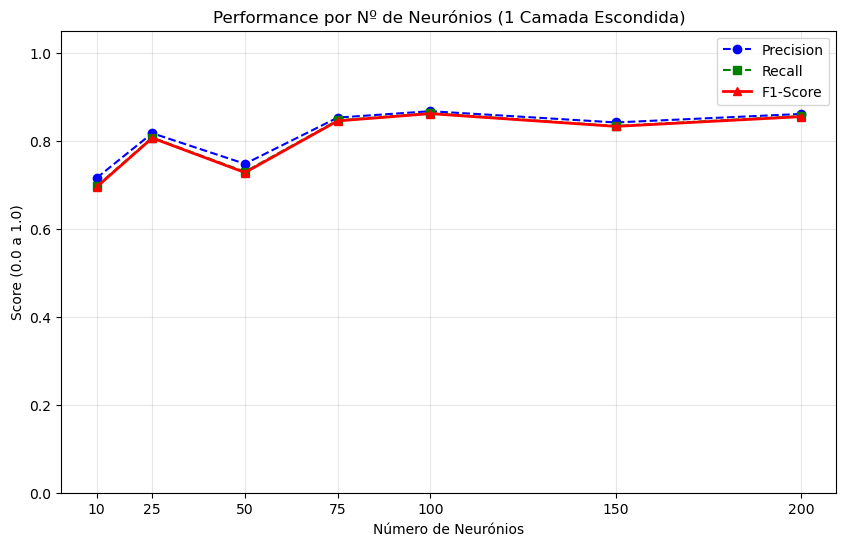

{'sizes': [10, 25, 50, 75, 100, 150, 200],
 'f1_scores': [0.6948328849418333,
  0.8062036046487051,
  0.7276435872709953,
  0.8450379658273043,
  0.8615051148942394,
  0.8325673963192631,
  0.8547061417053905],
 'precision': [0.7152981862402636,
  0.8170692322451101,
  0.7474969073912126,
  0.8525482662770656,
  0.8671077869369096,
  0.8415234604459382,
  0.8608528026100719],
 'recall': [0.6964797127222984,
  0.8072810259917921,
  0.7295578020975831,
  0.8462156452348382,
  0.8623951071591428,
  0.8335488326493389,
  0.8559504696762426]}

In [7]:
createMLP_variableSizes(
    X_train_scaled, y_train, X_test_scaled, y_test,
    learning_rate_type='adaptive',  
    learning_rate=0.01, # Valor inicial
    momentum=0.0,
)

## 4.3

In [ ]:
metrics = createMLP(X_train, y_train, X_test, y_test, label="4.2 - variable learning rate", learning_rate_type='adaptive', momentum=0.9)

Neurónios  | F1-Score  
-------------------------
10         | 0.7142
25         | 0.8626


c:\Users\Xaneca\miniconda3\envs\HCAI_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


50         | 0.9258
75         | 0.9134
100        | 0.9334
150        | 0.9403
200        | 0.9391


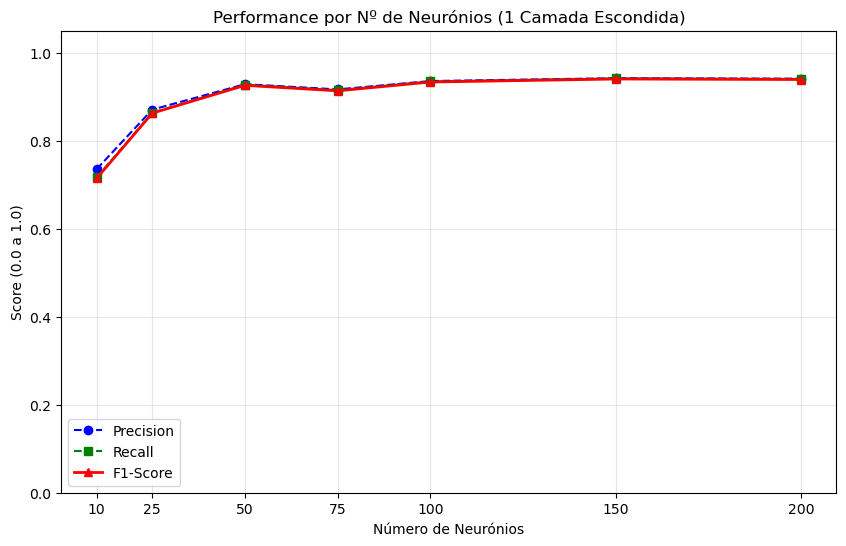

{'sizes': [10, 25, 50, 75, 100, 150, 200],
 'f1_scores': [0.7142350625627312,
  0.8626255601830823,
  0.9258464083979929,
  0.9134069083395197,
  0.9333726088525884,
  0.9402846898295344,
  0.9390913931259284],
 'precision': [0.7354341836587738,
  0.8706174562006932,
  0.9284318627612226,
  0.9166612063048099,
  0.9356431227908658,
  0.9421424991703148,
  0.9410447813408528],
 'recall': [0.7165464067487459,
  0.8635230916552669,
  0.9273563246694027,
  0.9149092202462381,
  0.9346771637026905,
  0.9416682170542636,
  0.9404234290925672]}

In [8]:
createMLP_variableSizes(
    X_train_scaled, y_train, X_test_scaled, y_test,
    learning_rate_type='adaptive',
    learning_rate=0.01,
    momentum=0.9,  # Valor típico de momentum (0.9)
)

# EX 5

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
data = 
labels = 

In [8]:
import numpy as np
import pandas as pd

# Certifique-se de que a classe NeuralNetwork (o código grande anterior) já foi executada/importada

# 1. Definir a arquitetura
# X_train_scaled.shape[1] dá-nos o número de colunas (features) automaticamente
input_size = X_train_scaled.shape[1] 
hidden_size = 100
output_size = int(np.max(y_train)) + 1

layer_sizes = [input_size, hidden_size, output_size]

# 2. Criar a rede
# Nota: Use o nome da classe que definiu (NeuralNetwork ou OurMLP)
nn = OurNeuralNetwork(layer_sizes, activation="sigmoid", learning_rate=1.0)

# 3. Treinar com os dados SCALED
print("A iniciar treino...")
# O método train usa o forward -> backward -> update weights repetidamente
history = nn.train(X_train_scaled, y_train, epochs=1000)

# 4. Agora sim: Usar o Teste (Respondendo à sua pergunta)
print("\nA fazer previsões no conjunto de Teste...")
# O predict serve para QUALQUER dado. Aqui passamos o X_test (que tmb deve estar scaled)
preds_test = nn.evaluate(X_test_scaled, y_test) # Assumindo que você tem um X_test_scaled

preds_reais = nn.predict(X_test_scaled)

print("\nPrevisões (primeiras 10):", preds_reais[:10])

A iniciar treino...
Epoch 0: Loss 2.0729
Epoch 100: Loss 0.8939
Epoch 200: Loss 0.7326
Epoch 300: Loss 0.6112
Epoch 400: Loss 0.5700
Epoch 500: Loss 0.5417
Epoch 600: Loss 0.5273
Epoch 700: Loss 0.5766
Epoch 800: Loss 0.4863
Epoch 900: Loss 0.4865

A fazer previsões no conjunto de Teste...

===== Test Results =====
Confusion Matrix:
[[929   0   0   4   0   1   0]
 [  0 425  77   0   0   0   0]
 [  0 245 267   0   0   0   0]
 [  4   0   0 782  30  10   0]
 [ 11   0   0 663 175   5   0]
 [  0   0   0   2   0 545   0]
 [  0   0   0   4   1 250   2]]
Recall:    0.6455
Precision: 0.7791
F1-Score:  0.5961

Previsões (primeiras 10): [1 1 1 1 1 1 1 1 1 1]
